# The Rents / Home Price - Income Ratio Map 
* Let's make an interactive Voila Dashboard where the user can see avg rents, avg home price, and avg income 
* and how ZIP codes that would be subject to streamlining 

In [91]:
import pandas as pd
import geopandas as gpd
import ipyleaflet
from ipyleaflet import Map, GeoData, basemaps, LayersControl

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Download the Data

In [4]:
!wget http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_AllHomes.csv -O data/home-prices.csv 

--2020-02-02 17:16:07--  http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_AllHomes.csv
Resolving files.zillowstatic.com (files.zillowstatic.com)... 13.226.238.33, 13.226.238.90, 13.226.238.6, ...
Connecting to files.zillowstatic.com (files.zillowstatic.com)|13.226.238.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48618195 (46M) [binary/octet-stream]
Saving to: ‘data/home-prices.csv’

data/home-prices.cs 100%[===================>]  46.37M  50.2MB/s    in 0.9s    

2020-02-02 17:16:09 (50.2 MB/s) - ‘data/home-prices.csv’ saved [48618195/48618195]



In [5]:
!wget http://files.zillowstatic.com/research/public/Zip/Zip_Zri_AllHomesPlusMultifamily_Summary.csv -O data/rent-prices.csv

--2020-02-02 17:16:42--  http://files.zillowstatic.com/research/public/Zip/Zip_Zri_AllHomesPlusMultifamily_Summary.csv
Resolving files.zillowstatic.com (files.zillowstatic.com)... 13.226.238.113, 13.226.238.6, 13.226.238.90, ...
Connecting to files.zillowstatic.com (files.zillowstatic.com)|13.226.238.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1314698 (1.3M) [binary/octet-stream]
Saving to: ‘data/rent-prices.csv’

data/rent-prices.cs 100%[===================>]   1.25M  --.-KB/s    in 0.08s   

2020-02-02 17:16:42 (15.2 MB/s) - ‘data/rent-prices.csv’ saved [1314698/1314698]



In [2]:
rent_data = pd.read_csv('./data/rent-prices.csv')
rent_data.head()

,Date,RegionName,State,Metro,County,City,SizeRank,Zri,MoM,QoQ,YoY,ZriRecordCnt
0,2019-12-31,10025,NY,New York-Newark-Jersey City,New York County,New York,0,3870,-0.0100,0.0146,0.1288,30565
1,2019-12-31,10023,NY,New York-Newark-Jersey City,New York County,New York,1,4180,-0.0107,0.0294,0.0908,36095
2,2019-12-31,77494,TX,Houston-The Woodlands-Sugar Land,Harris County,Katy,2,1780,0.0040,0.0094,-0.0026,43041
3,2019-12-31,60614,IL,Chicago-Naperville-Elgin,Cook County,Chicago,3,2330,-0.0191,-0.0418,0.0227,35617
4,2019-12-31,77449,TX,Houston-The Woodlands-Sugar Land,Harris County,Katy,4,1470,0.0188,0.0313,0.0181,41089


In [3]:
home_data = pd.read_csv('./data/home-prices.csv', engine='python')
home_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,229011.0,229723.0,230303.0,...,1323473,1310806,1304288,1292400,1268453,1231999,1200225,1190513,1201389,1212916
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,204066.0,203752.0,204737.0,...,484536,485356,484823,483136,482049,479947,477869,475778,474614,473836
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,247266.0,248723.0,249675.0,...,1182445,1174980,1174939,1171951,1176050,1170613,1145540,1136414,1147577,1178571
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,197780.0,196728.0,195786.0,...,335615,334863,334371,334005,334189,333952,334281,334285,334505,334135
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,275535.0,275100.0,276134.0,...,631204,632961,632124,629721,627803,625515,623036,620855,619097,617942


In [4]:
acs_data = pd.read_csv('./data/acs-data.csv', skiprows=[1])
acs_data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (111,113,159) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GEO_ID,NAME,S1902_C01_001E,S1902_C01_001M,S1902_C02_001E,S1902_C02_001M,S1902_C03_001E,S1902_C03_001M,S1902_C01_002E,S1902_C01_002M,...,S1902_C02_027E,S1902_C02_027M,S1902_C03_027E,S1902_C03_027M,S1902_C01_028E,S1902_C01_028M,S1902_C02_028E,S1902_C02_028M,S1902_C03_028E,S1902_C03_028M
0,8600000US00601,ZCTA5 00601,5517.0,254.0,5517.0,254.0,18893,1780,2467.0,239.0,...,99.7,0.2,6980,678,52.0,40.0,0.3,0.2,13902,11004
1,8600000US00602,ZCTA5 00602,12738.0,429.0,12738.0,429.0,25019,1706,6780.0,488.0,...,93.5,1.1,8840,492,2102.0,415.0,5.5,1.1,15222,4411
2,8600000US00603,ZCTA5 00603,19233.0,491.0,19233.0,491.0,28089,2197,9422.0,514.0,...,97.4,0.8,11054,884,698.0,295.0,1.4,0.6,23669,9261
3,8600000US00606,ZCTA5 00606,2014.0,173.0,2014.0,173.0,16419,1814,1005.0,167.0,...,99.8,0.3,5953,780,10.0,19.0,0.2,0.3,-,**
4,8600000US00610,ZCTA5 00610,8858.0,367.0,8858.0,367.0,26909,1770,4873.0,379.0,...,96.2,1.1,10066,720,874.0,273.0,3.2,1.0,14403,3185


## Link Join and Clean Dataframe 

In [5]:
## Acs 
pd.read_csv('./data/acs-data.csv', nrows=1).transpose().head(10)

,0
GEO_ID,id
NAME,Geographic Area Name
S1902_C01_001E,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...
S1902_C01_001M,Margin of Error!!Number MOE!!HOUSEHOLD INCOME!...
S1902_C02_001E,Estimate!!Percent Distribution!!HOUSEHOLD INCO...
S1902_C02_001M,Margin of Error!!Percent Distribution MOE!!HOU...
S1902_C03_001E,Estimate!!Mean income (dollars)!!HOUSEHOLD INC...
S1902_C03_001M,Margin of Error!!Mean income (dollars) MOE!!HO...
S1902_C01_002E,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...
S1902_C01_002M,Margin of Error!!Number MOE!!HOUSEHOLD INCOME!...


In [7]:
cleaned_income = (acs_data[['S1902_C03_001E','NAME']].
 rename({'S1902_C03_001E': 'mean_income', 'NAME': 'zip_code'}, axis=1))
cleaned_income['zip_code'] = cleaned_income.zip_code.str[-5:]
cleaned_income.head()

,mean_income,zip_code
0,18893,00601
1,25019,00602
2,28089,00603
3,16419,00606
4,26909,00610


### Rent 

In [8]:
cleaned_rent = (rent_data.rename({'RegionName': 'zip_code', 'Zri': 'rent'}, axis=1)[['rent', 'zip_code']])
cleaned_rent.head()

,rent,zip_code
0,3870,10025
1,4180,10023
2,1780,77494
3,2330,60614
4,1470,77449


In [9]:
cleaned_home = (home_data.rename({'RegionName': 'zip_code', '2019-12': 'home_price'}, axis=1)[['home_price', 'zip_code']])
cleaned_home.head()

,home_price,zip_code
0,1212916,10025
1,473836,60657
2,1178571,10023
3,334135,77494
4,617942,60614


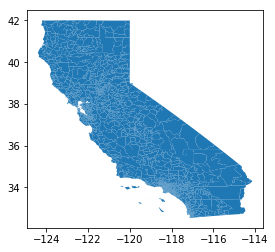

In [10]:
zctas = gpd.read_file('https://opendata.arcgis.com/datasets/babeb4401ef54ba49a3b8b93e8b456aa_0.geojson')
zctas.plot()

In [11]:
print(f'There are {len(zctas)} ZCTAs in California')

There are 1717 ZCTAs in California


In [24]:
cleaned_home.zip_code = pd.to_numeric(cleaned_home.zip_code)
cleaned_rent.zip_code = pd.to_numeric(cleaned_rent.zip_code)
cleaned_income.zip_code = pd.to_numeric(cleaned_income.zip_code)

In [12]:
cleaned_zctas = zctas[['ZIP_CODE', 'geometry']].rename({'ZIP_CODE': 'zip_code'}, axis=1)

In [39]:
cleaned_zctas.zip_code = pd.to_numeric(cleaned_zctas.zip_code)
df = (cleaned_zctas.set_index('zip_code').
 join(cleaned_home.set_index('zip_code')).
 join(cleaned_income.set_index('zip_code')).
 join(cleaned_rent.set_index('zip_code')))
df.head()

,geometry,home_price,mean_income,rent
zip_code,,,,
95017,"POLYGON ((-122.19303 37.00962, -122.19285 37.0...",787612.0,97903,NaN
95060,"POLYGON ((-122.05979 36.94987, -122.05965 36.9...",935579.0,108148,3240.0
94037,"POLYGON ((-122.50915 37.53414, -122.50870 37.5...",1178189.0,125181,NaN
94060,"MULTIPOLYGON (((-122.29322 37.10712, -122.2926...",897739.0,144284,NaN
94074,"POLYGON ((-122.34917 37.26410, -122.34903 37.2...",1490021.0,243694,NaN


In [50]:
df['ratio_home'] = df.home_price / pd.to_numeric(df.mean_income, errors='coerce')

## Sliders / Map 

In [40]:
df.geometry = df.geometry.simplify(.001)

In [123]:
## Widget 
ratio = widgets.FloatSlider(
    value=5.0,
    min=1,
    max=20.0,
    step=0.1,
    description='Ratio of Home Prices to Mean Income:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

widgets.link((ratio, 'value'), (m, 'layers'))
# render Map 
m = Map(center=(36.7, -119.5), zoom = 5, basemap= basemaps.Esri.WorldTopoMap)
geo_data = GeoData(geo_dataframe =  df.query(f'ratio_home > {ratio.value}').reset_index(),
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Zip Codes')

# Create an output widget for the map
info = widgets.HTML()

def display_ratio_info(interactive=True, properties=None):
    info.value = f"""
    <div><b>Home Price / Mean Income</b></div>
    """
    if interactive and not properties:
        info.value = (
            info.value +
            "<div><em>Hover over a zip code to see home price and mean income</em></div>"
        )
    elif interactive and properties is not None:
        info.value = (
            info.value +
            f"""Zip Code: <div><em>{properties["zip_code"]}</em></div>
            <div>Mean Income: {properties["mean_income"]}</div>
            <div>Average home price: {properties["home_price"]}
            <div>Ratio: {properties['ratio_home']}
            """
        )
display_ratio_info()


# A callback which populates the output control with zip
# information for the given feature.
def callback(**kwargs):
    properties = kwargs.get("feature", {}).get("properties")
    if not properties:
        return
    display_ratio_info(True, properties)

layer = geo_data
layer.on_hover(callback)
m.add_layer(layer)
m.add_control(ipyleaflet.WidgetControl(widget=ratio, position='topright'))
m.add_control(ipyleaflet.WidgetControl(widget=info, position='topright'))
m

TraitError: The 'layers' trait of a Map instance must be a tuple, but a value of class 'float' (i.e. 5.0) was specified.